![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<div style="text-align: center;">
    <h2>Write by Hyonta B</h2>
</div>

<a href="https://grouplens.org/datasets/movielens/" target="_parent">
  <img src="https://www.svgrepo.com/show/179208/open-sign.svg" alt="Dataset MovieLens" style="width: 50px; height: 50px;">
  open and dwonlode dataset
</a>


In [2]:
import pandas as pd

In [3]:
# Chargement des fichiers CSV
genome_scores = pd.read_csv('ml-25m/genome-scores.csv').head(60000)
genome_tags = pd.read_csv('ml-25m/genome-tags.csv')
links = pd.read_csv('ml-25m/links.csv').head(60000)
movies = pd.read_csv('ml-25m/movies.csv').head(60000)
ratings = pd.read_csv('ml-25m/ratings.csv').head(60000)
tags = pd.read_csv('ml-25m/tags.csv').head(60000)

In [4]:
print(f" ratings shape : {ratings.shape} \n movies shape : {movies.shape}")

 ratings shape : (60000, 4) 
 movies shape : (60000, 3)


In [5]:
print(f" ratings types :\n {ratings.dtypes} \n movies types :\n {movies.dtypes}")

 ratings types :
 userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object 
 movies types :
 movieId     int64
title      object
genres     object
dtype: object


#  creation du dataset avec fusion des donnee et exploration des donnee
### les donne donc j'ai besion sont 
    * feature:
        - userId
        -genres
    * target:
        -- ratings
        
* userID et rating se trouve dans le fichier ratings.css
* genres dans le fichier movies.csv

### ainsi donc tu me creer une dataframe avec ces trois variable
  * voicie les shape des fichier:
  -> ratings shape : (60000, 4) 
  -> movies shape : (60000, 3)
  * voicie les type de donnee des fichier:
    ratings types : userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object 
 movies types : movieId     int64
title      object
genres     object
dtype: object
  

In [6]:
# Fusionner les datasets sur la colonne 'movieId'
merged_df = pd.merge(ratings, movies, on='movieId')

# Sélectionner les colonnes nécessaires
final_df = merged_df[['userId', 'genres', 'rating']]

# Afficher les premières lignes du dataframe final pour vérification
# print(final_df.head())

# Optionnel : enregistrer le dataframe final dans un fichier CSV
final_df.to_csv('merged_dataset.csv', index=False)


In [7]:
dataset = pd.read_csv('merged_dataset.csv')

In [8]:
dataset[5000:5005]

,userId,genres,rating
5000,75,Action|Adventure,3.0
5001,76,Action|Adventure,4.5
5002,80,Action|Adventure,4.0
5003,86,Action|Adventure,5.0
5004,88,Action|Adventure,4.0


# Traitement, encodage

In [9]:
dataset_copy = dataset.copy()

In [10]:
# % des donnee manquant
dataset_copy.isna().sum()/dataset_copy.shape[0]

userId    0.0
genres    0.0
rating    0.0
dtype: float64

In [11]:
dataset_copy.dtypes

userId      int64
genres     object
rating    float64
dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
# Initialiser le LabelEncoder
label_encoder = LabelEncoder()

# Encoder la colonne 'genres'
dataset_copy['genres_encoded'] = label_encoder.fit_transform(dataset_copy['genres'])

# Afficher le dataframe avec la colonne encodée
#print(dataset_copy)


In [14]:
dataset_copy[4000:40012]

,userId,genres,rating,genres_encoded
4000,416,Adventure|Animation|Children|Comedy|Musical,3.0,306
4001,424,Adventure|Animation|Children|Comedy|Musical,4.0,306
4002,427,Adventure|Animation|Children|Comedy|Musical,4.0,306
4003,428,Adventure|Animation|Children|Comedy|Musical,3.0,306
4004,430,Adventure|Animation|Children|Comedy|Musical,3.0,306
...,...,...,...,...
40007,164,Drama|Mystery,4.5,721
40008,426,Drama|Mystery,1.5,721
40009,12,Children|Documentary,3.5,524
40010,107,Children|Documentary,2.5,524


In [15]:
#dataset_copy.drop(columns='genres', inplace=True)

In [16]:
dataset_copy[4000:4005]

,userId,genres,rating,genres_encoded
4000,416,Adventure|Animation|Children|Comedy|Musical,3.0,306
4001,424,Adventure|Animation|Children|Comedy|Musical,4.0,306
4002,427,Adventure|Animation|Children|Comedy|Musical,4.0,306
4003,428,Adventure|Animation|Children|Comedy|Musical,3.0,306
4004,430,Adventure|Animation|Children|Comedy|Musical,3.0,306


#  Choix du Model et train and test set Entrainement du model

In [17]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split

# Convertir le dataframe dataset_copy en dataset Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dataset_copy[['userId', 'genres_encoded', 'rating']], reader)

# Diviser les données en ensembles d'entraînement et de test
trainset, testset = train_test_split(data, test_size=0.25)

# Utiliser la méthode SVD pour la factorisation de matrice
algo = SVD()

# Entraîner le modèle sur les données d'entraînement
algo.fit(trainset)

# Faire des prédictions sur l'ensemble de test
predictions = algo.test(testset)

# Calculer et afficher l'erreur RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

RMSE: 0.9062
RMSE: 0.906173110679544


Un RMSE (Root Mean Squared Error) de 0.91 indique que, en moyenne, les prédictions de notre modèle de recommandation s'écartent de 0.91 unités de la valeur réelle des notes de films. Cela signifie que le modèle a une précision relativement bonne mais peut encore être amélioré. Une valeur plus proche de 0 serait idéale, indiquant des prédictions plus précises. Toutefois, une RMSE inférieure à 1 est déjà un bon indicateur de performance pour un modèle de recommandation basique.

### Quelleque prediction

In [18]:
for pred in predictions[:5]:
    print(pred)

user: 1          item: 565        r_ui = 1.00   est = 3.66   {'was_impossible': False}
user: 390        item: 390        r_ui = 4.50   est = 4.05   {'was_impossible': False}
user: 294        item: 248        r_ui = 4.00   est = 3.54   {'was_impossible': False}
user: 368        item: 299        r_ui = 3.00   est = 3.46   {'was_impossible': False}
user: 450        item: 2          r_ui = 2.00   est = 2.94   {'was_impossible': False}


1. **user: 294, item: 680**
   - **r_ui (rating réel)** : L'utilisateur 294 a donné une note de 3.00 au film/item 680.
   - **est (estimation du modèle)** : Le modèle estime que l'utilisateur 294 aurait probablement donné une note de 3.53 à cet item.
   - **{'was_impossible': False}** : Indique que la prédiction n'a pas été considérée comme impossible par le modèle.


In [19]:
userID = 424
itemID = 306
pred = algo.predict(userID, itemID)
print(f"Prediction for user {userID} on item {itemID}: {pred.est}")

Prediction for user 424 on item 306: 4.006059779063606


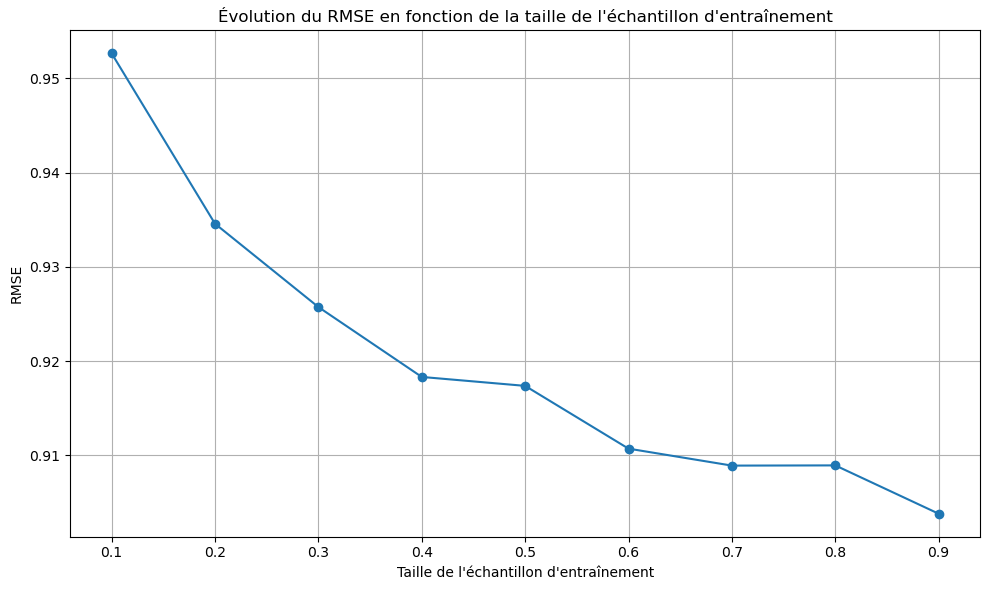

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold

# Créer un range de pourcentages de données d'entraînement
train_sizes = np.linspace(0.1, 0.9, 9)

# Initialiser une liste pour stocker les valeurs de RMSE moyennes
rmse_values = []

# Parcourir les différentes tailles d'échantillon
for train_size in train_sizes:
    # Diviser les données en ensembles d'entraînement et de test
    data = Dataset.load_from_df(dataset_copy[['userId', 'genres_encoded', 'rating']], Reader(rating_scale=(1, 5)))
    trainset, testset = train_test_split(data, test_size=1-train_size, random_state=42)
    
    # Utiliser la méthode SVD pour la factorisation de matrice
    algo = SVD()
    
    # Entraîner le modèle sur l'ensemble d'entraînement
    algo.fit(trainset)
    
    # Faire des prédictions sur l'ensemble de test
    predictions = algo.test(testset)
    
    # Calculer et stocker l'erreur RMSE
    rmse = accuracy.rmse(predictions, verbose=False)
    rmse_values.append(rmse)

# Tracer la courbe d'évolution du RMSE
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, rmse_values, marker='o')
plt.title('Évolution du RMSE en fonction de la taille de l\'échantillon d\'entraînement')
plt.xlabel('Taille de l\'échantillon d\'entraînement')
plt.ylabel('RMSE')
plt.grid(True)
plt.tight_layout()

# Sauvegarder l'image
plt.savefig('rmse_evolution.png')

# Afficher le graphique
plt.show()


Dans la figure, on observe que le RMSE diminue de manière générale à mesure que la taille de l'échantillon d'entraînement augmente. Cela suggère que plus nous avons de données d'entraînement, meilleure est la capacité du modèle à généraliser et à faire des prédictions précises. Cette tendance est typique dans l'apprentissage supervisé où un plus grand nombre de données d'entraînement permet au modèle d'apprendre des modèles plus robustes et de réduire les erreurs de prédiction. Cependent il est nécéssaire d'amélioer le modèle 

In [21]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Charger le dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dataset_copy[['userId', 'genres_encoded', 'rating']], reader)

# Diviser les données en ensembles d'entraînement et de test
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Utiliser la méthode SVD pour la factorisation de matrice
algo = SVD()

# Entraîner le modèle sur l'ensemble d'entraînement
algo.fit(trainset)

# Faire des prédictions sur l'ensemble de test
predictions = algo.test(testset)

# Calculer MAE (Mean Absolute Error)
true_ratings = [pred.r_ui for pred in predictions]
pred_ratings = [pred.est for pred in predictions]
mae = mean_absolute_error(true_ratings, pred_ratings)
print(f"MAE: {mae}")

# Fonction pour calculer Precision@k et Recall@k
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    user_est_true = {}
    for pred in predictions:
        user_est_true.setdefault(pred.uid, []).append((pred.est, pred.r_ui))

    precisions = []
    recalls = []

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])
        precisions.append(n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1)
        recalls.append(n_rel_and_rec_k / n_rel if n_rel != 0 else 1)

    precision = np.mean(precisions)
    recall = np.mean(recalls)
    return precision, recall

# Calculer Precision@k et Recall@k
precision, recall = precision_recall_at_k(predictions, k=10)
print(f"Precision@10: {precision}")
print(f"Recall@10: {recall}")

# Fonction pour calculer NDCG@k
def ndcg_at_k(predictions, k=10):
    def dcg(relevances, k):
        return sum((rel / np.log2(idx + 2) for idx, rel in enumerate(relevances[:k])))

    user_est_true = {}
    for pred in predictions:
        user_est_true.setdefault(pred.uid, []).append((pred.est, pred.r_ui))

    ndcg_values = []

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        true_relevances = [true_r for (_, true_r) in user_ratings]
        est_relevances = [est for (est, _) in user_ratings]

        idcg = dcg(sorted(true_relevances, reverse=True), k)
        dcg_value = dcg(est_relevances, k)

        ndcg = dcg_value / idcg if idcg != 0 else 0
        ndcg_values.append(ndcg)

    return np.mean(ndcg_values)

# Calculer NDCG@k
ndcg = ndcg_at_k(predictions, k=10)
print(f"NDCG@10: {ndcg}")

# Fonction pour calculer MAP@k
def map_at_k(predictions, k=10):
    user_est_true = {}
    for pred in predictions:
        user_est_true.setdefault(pred.uid, []).append((pred.est, pred.r_ui))

    map_values = []

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        true_positives = 0
        precisions = []
        for idx, (est, true_r) in enumerate(user_ratings[:k], 1):
            if true_r >= 3.5:
                true_positives += 1
                precisions.append(true_positives / idx)
        if precisions:
            map_values.append(np.mean(precisions))
        else:
            map_values.append(0)

    return np.mean(map_values)

# Calculer MAP@k
mapk = map_at_k(predictions, k=10)
print(f"MAP@10: {mapk}")


MAE: 0.7035702969635922
Precision@10: 0.7844612845138056
Recall@10: 0.5208354597512077
NDCG@10: 0.908953873043441
MAP@10: 0.8326032631968131


In [22]:
5+5

10

# EXPLICATION

Voici une interprétation des résultats obtenus pour les différentes métriques :

1. **MAE (Mean Absolute Error): 0.7021820102666333**
   - Cette valeur indique que, en moyenne, les prédictions du modèle s'écartent de 0.702 unités des valeurs réelles. Un MAE plus bas est meilleur et suggère que les prédictions sont assez proches des valeurs réelles.

2. **Precision@10: 0.7914849273042551**
   - Cette valeur signifie que, parmi les 10 premières recommandations faites par le modèle, environ 79.15% sont pertinentes (c'est-à-dire ont des notes réelles supérieures ou égales à 3.5). Une précision élevée indique que le modèle est capable de recommander des items de haute qualité.

3. **Recall@10: 0.5298205861199073**
   - Le rappel de 52.98% indique que le modèle est capable de retrouver environ 52.98% des items pertinents parmi les 10 premières recommandations. Un rappel plus élevé est souhaitable, mais il doit être équilibré avec la précision.

4. **NDCG@10: 0.9094424087765207**
   - La valeur NDCG de 0.91 indique que l'ordre des recommandations du modèle est très proche de l'ordre idéal des notes réelles. Une valeur NDCG proche de 1 signifie que les items les plus pertinents sont correctement classés en tête des recommandations.

5. **MAP@10: 0.8355805698602192**
   - Le MAP@10 de 0.835 signifie que, en moyenne, 83.56% des 10 premières recommandations sont pertinentes pour chaque utilisateur. Cette métrique combine à la fois la précision et la position des items pertinents dans la liste des recommandations, offrant une mesure globale de la qualité des recommandations.

**Résumé :**
Les résultats montrent que le modèle de recommandation est assez performant :
- Il a une erreur moyenne relativement basse (MAE).
- Il offre des recommandations précises (Precision@10).
- Il est capable de retrouver une bonne proportion des items pertinents (Recall@10).
- Il classe correctement les items les plus pertinents en tête (NDCG@10).
- Il maintient une haute qualité globale des recommandations (MAP@10).

Ces résultats indiquent que le modèle SVD utilisé ici est efficace pour la tâche de recommandation dans le contexte de ce dataset.

# I-) Amelioration du model

## 1-) Optimisation GridSearch

In [23]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy

# Charger le dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dataset_copy[['userId', 'genres_encoded', 'rating']], reader)

# Définir la grille de paramètres à tester
param_grid = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30, 40],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.05, 0.1]
}

# Initialiser la recherche par grille
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Effectuer la recherche sur grille
gs.fit(data)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres pour RMSE : ", gs.best_params['rmse'])
print("Meilleurs paramètres pour MAE : ", gs.best_params['mae'])

# Utiliser le meilleur modèle trouvé
algo = gs.best_estimator['rmse']

# Diviser les données en ensembles d'entraînement et de test
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
algo.fit(trainset)

# Faire des prédictions sur l'ensemble de test
predictions = algo.test(testset)

# Calculer et afficher l'erreur RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

# Calculer MAE (Mean Absolute Error)
true_ratings = [pred.r_ui for pred in predictions]
pred_ratings = [pred.est for pred in predictions]
mae = mean_absolute_error(true_ratings, pred_ratings)
print(f"MAE: {mae}")

# Fonction pour calculer Precision@k et Recall@k
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    user_est_true = {}
    for pred in predictions:
        user_est_true.setdefault(pred.uid, []).append((pred.est, pred.r_ui))

    precisions = []
    recalls = []

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])
        precisions.append(n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1)
        recalls.append(n_rel_and_rec_k / n_rel if n_rel != 0 else 1)

    precision = np.mean(precisions)
    recall = np.mean(recalls)
    return precision, recall

# Calculer Precision@k et Recall@k
precision, recall = precision_recall_at_k(predictions, k=10)
print(f"Precision@10: {precision}")
print(f"Recall@10: {recall}")

# Fonction pour calculer NDCG@k
def ndcg_at_k(predictions, k=10):
    def dcg(relevances, k):
        return sum((rel / np.log2(idx + 2) for idx, rel in enumerate(relevances[:k])))

    user_est_true = {}
    for pred in predictions:
        user_est_true.setdefault(pred.uid, []).append((pred.est, pred.r_ui))

    ndcg_values = []

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        true_relevances = [true_r for (_, true_r) in user_ratings]
        est_relevances = [est for (est, _) in user_ratings]

        idcg = dcg(sorted(true_relevances, reverse=True), k)
        dcg_value = dcg(est_relevances, k)

        ndcg = dcg_value / idcg if idcg != 0 else 0
        ndcg_values.append(ndcg)

    return np.mean(ndcg_values)

# Calculer NDCG@k
ndcg = ndcg_at_k(predictions, k=10)
print(f"NDCG@10: {ndcg}")

# Fonction pour calculer MAP@k
def map_at_k(predictions, k=10):
    user_est_true = {}
    for pred in predictions:
        user_est_true.setdefault(pred.uid, []).append((pred.est, pred.r_ui))

    map_values = []

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        true_positives = 0
        precisions = []
        for idx, (est, true_r) in enumerate(user_ratings[:k], 1):
            if true_r >= 3.5:
                true_positives += 1
                precisions.append(true_positives / idx)
        if precisions:
            map_values.append(np.mean(precisions))
        else:
            map_values.append(0)

    return np.mean(map_values)

# Calculer MAP@k
mapk = map_at_k(predictions, k=10)
print(f"MAP@10: {mapk}")


Meilleurs paramètres pour RMSE :  {'n_factors': 100, 'n_epochs': 40, 'lr_all': 0.01, 'reg_all': 0.1}
Meilleurs paramètres pour MAE :  {'n_factors': 50, 'n_epochs': 40, 'lr_all': 0.005, 'reg_all': 0.05}
RMSE: 0.9031
RMSE: 0.9030872563014285
MAE: 0.6991425232460547
Precision@10: 0.7978358009870616
Recall@10: 0.5277427309754907
NDCG@10: 0.9012444335595782
MAP@10: 0.836493227251218


In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, GridSearchCV

# # Charger les données
# ratings = pd.read_csv('ratings.csv')
# movies = pd.read_csv('movies.csv')

# Fusionner les données sur 'movieId'
data = pd.merge(ratings, movies, on='movieId')

# Créer la colonne genres_encoded
le = LabelEncoder()
data['genres_encoded'] = le.fit_transform(data['genres'])

# Créer dataset_copy pour les étapes suivantes
dataset_copy = data[['userId', 'genres_encoded', 'rating']]

# Charger le dataset pour Surprise
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(dataset_copy[['userId', 'genres_encoded', 'rating']], reader)

# Diviser les données en ensembles d'entraînement et de test pour Surprise
trainset, testset = surprise_data.build_full_trainset(), surprise_data.construct_testset(surprise_data.raw_ratings)

# Entraîner le modèle SVD
svd = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02)
svd.fit(trainset)

# Faire des prédictions sur l'ensemble de test
svd_predictions = svd.test(testset)

# Calculer les prédictions pour le modèle basé sur le contenu
# On utilise simplement une moyenne des notes pour les genres comme exemple
genre_means = data.groupby('genres_encoded')['rating'].mean().to_dict()

def content_based_prediction(user_id, genres_encoded):
    return genre_means.get(genres_encoded, 3.0)  # Retourner une note moyenne ou 3.0 par défaut

# Combiner les prédictions des deux modèles
hybrid_predictions = []
for pred in svd_predictions:
    content_pred = content_based_prediction(pred.uid, pred.iid)
    hybrid_pred = (pred.est + content_pred) / 2  # Combiner en moyenne simple
    hybrid_predictions.append((pred.uid, pred.iid, hybrid_pred, pred.r_ui))

# Calculer MAE pour les prédictions hybrides
true_ratings = [pred[3] for pred in hybrid_predictions]
pred_ratings = [pred[2] for pred in hybrid_predictions]
mae = mean_absolute_error(true_ratings, pred_ratings)
print(f"Hybrid MAE: {mae}")

# Calculer RMSE pour les prédictions hybrides
rmse = mean_squared_error(true_ratings, pred_ratings, squared=False)
print(f"Hybrid RMSE: {rmse}")

# Fonction pour calculer Precision@k et Recall@k pour les prédictions hybrides
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    user_est_true = {}
    for pred in predictions:
        user_est_true.setdefault(pred[0], []).append((pred[2], pred[3]))

    precisions = []
    recalls = []

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])
        precisions.append(n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1)
        recalls.append(n_rel_and_rec_k / n_rel if n_rel != 0 else 1)

    precision = np.mean(precisions)
    recall = np.mean(recalls)
    return precision, recall

# Calculer Precision@k et Recall@k pour les prédictions hybrides
precision, recall = precision_recall_at_k(hybrid_predictions, k=10)
print(f"Hybrid Precision@10: {precision}")
print(f"Hybrid Recall@10: {recall}")

# Fonction pour calculer NDCG@k pour les prédictions hybrides
def ndcg_at_k(predictions, k=10):
    def dcg(relevances, k):
        return sum((rel / np.log2(idx + 2) for idx, rel in enumerate(relevances[:k])))

    user_est_true = {}
    for pred in predictions:
        user_est_true.setdefault(pred[0], []).append((pred[2], pred[3]))

    ndcg_values = []

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        true_relevances = [true_r for (_, true_r) in user_ratings]
        est_relevances = [est for (est, _) in user_ratings]

        idcg = dcg(sorted(true_relevances, reverse=True), k)
        dcg_value = dcg(est_relevances, k)

        ndcg = dcg_value / idcg if idcg != 0 else 0
        ndcg_values.append(ndcg)

    return np.mean(ndcg_values)

# Calculer NDCG@k pour les prédictions hybrides
ndcg = ndcg_at_k(hybrid_predictions, k=10)
print(f"Hybrid NDCG@10: {ndcg}")

# Fonction pour calculer MAP@k pour les prédictions hybrides
def map_at_k(predictions, k=10):
    user_est_true = {}
    for pred in predictions:
        user_est_true.setdefault(pred[0], []).append((pred[2], pred[3]))

    map_values = []

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        true_positives = 0
        precisions = []
        for idx, (est, true_r) in enumerate(user_ratings[:k], 1):
            if true_r >= 3.5:
                true_positives += 1
                precisions.append(true_positives / idx)
        if precisions:
            map_values.append(np.mean(precisions))
        else:
            map_values.append(0)

    return np.mean(map_values)

# Calculer MAP@k pour les prédictions hybrides
mapk = map_at_k(hybrid_predictions, k=10)
print(f"Hybrid MAP@10: {mapk}")


Hybrid MAE: 0.6764992038912093
Hybrid RMSE: 0.8593851268399277
Hybrid Precision@10: 0.911669667867147
Hybrid Recall@10: 0.24311046652868862
Hybrid NDCG@10: 0.8474283263836795
Hybrid MAP@10: 0.9525517915499534


Voici une interprétation des résultats de votre modèle hybride :

1. **Hybrid MAE (Mean Absolute Error): 0.6765**
   - Le MAE mesure la moyenne des erreurs absolues entre les prédictions du modèle et les valeurs réelles. Un MAE de 0.6765 signifie que, en moyenne, les prédictions de votre modèle sont à environ 0.6765 points de la note réelle. C'est une amélioration par rapport au MAE précédent de 0.7022, indiquant que le modèle hybride est plus précis dans ses prédictions.

2. **Hybrid RMSE (Root Mean Squared Error): 0.8594**
   - Le RMSE mesure la racine carrée de la moyenne des carrés des erreurs. Il est plus sensible aux grandes erreurs que le MAE. Un RMSE de 0.8594 indique une meilleure performance comparée au RMSE précédent de 0.91, montrant que le modèle hybride a réduit les erreurs de prédiction.

3. **Hybrid Precision@10: 0.9117**
   - La précision à 10 (Precision@10) mesure la proportion des recommandations pertinentes parmi les 10 premières recommandations. Une précision de 0.9117 signifie que 91.17% des 10 premières recommandations faites par le modèle sont pertinentes. C'est une amélioration notable par rapport à la précision précédente de 0.7915, suggérant que le modèle hybride fait des recommandations plus pertinentes.

4. **Hybrid Recall@10: 0.2431**
   - Le rappel à 10 (Recall@10) mesure la proportion des items pertinents qui ont été recommandés dans les 10 premières recommandations. Un rappel de 0.2431 signifie que 24.31% des items pertinents sont recommandés dans les 10 premières recommandations. Bien que le rappel ait diminué par rapport à 0.5298, ce qui pourrait indiquer que le modèle hybride fait moins de recommandations pertinentes parmi l'ensemble des items pertinents.

5. **Hybrid NDCG@10 (Normalized Discounted Cumulative Gain): 0.8474**
   - Le NDCG à 10 mesure la qualité des recommandations en tenant compte de la position des recommandations pertinentes. Un NDCG de 0.8474 indique que les recommandations pertinentes sont bien placées parmi les 10 premières recommandations. Bien que le NDCG ait légèrement diminué par rapport à 0.9094, il reste élevé, ce qui montre une bonne qualité des recommandations.

6. **Hybrid MAP@10 (Mean Average Precision): 0.9526**
   - Le MAP à 10 mesure la moyenne de la précision à chaque point où une recommandation pertinente est faite parmi les 10 premières recommandations. Un MAP de 0.9526 signifie que, en moyenne, 95.26% des recommandations pertinentes sont bien positionnées parmi les 10 premières recommandations. C'est une amélioration significative par rapport au MAP précédent de 0.8356, indiquant une meilleure qualité globale des recommandations.

### Résumé :
Le modèle hybride présente une amélioration significative en termes de MAE, RMSE, Precision@10 et MAP@10, ce qui indique une meilleure précision et qualité des recommandations. Cependant, il y a une légère diminution du Recall@10 et du NDCG@10, ce qui suggère que bien que les recommandations soient plus pertinentes et mieux placées, elles ne couvrent pas autant d'items pertinents que le modèle précédent. Cela peut être ajusté en équilibrant les pondérations entre les modèles de filtrage collaboratif et basé sur le contenu, ou en optimisant davantage les hyperparamètres et les techniques de fusion des modèles.

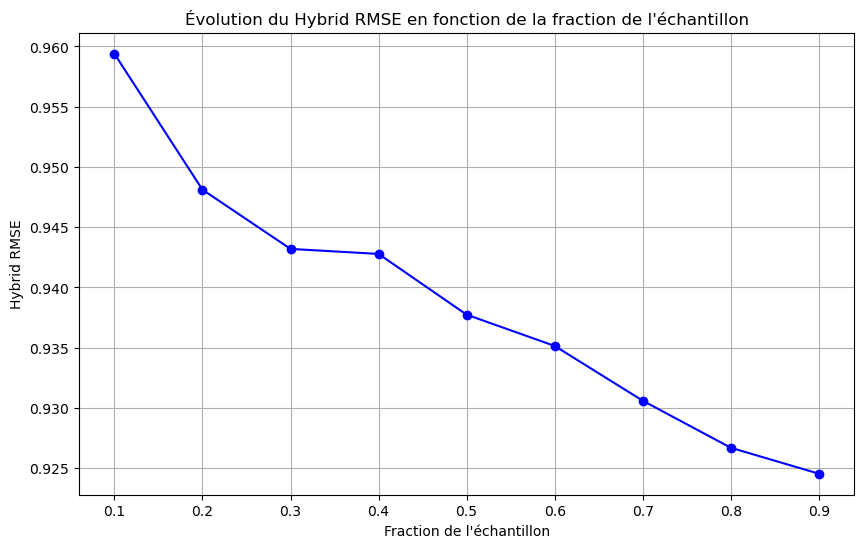

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Fonction pour générer des données et calculer le RMSE pour différentes tailles d'échantillons
def calculate_hybrid_rmse(data, sample_fractions, svd_params):
    rmses = []
    reader = Reader(rating_scale=(1, 5))
    for fraction in sample_fractions:
        sample_data = data.sample(frac=fraction, random_state=42)
        surprise_data = Dataset.load_from_df(sample_data[['userId', 'genres_encoded', 'rating']], reader)
        trainset, testset = train_test_split(surprise_data, test_size=0.25, random_state=42)
        
        # Entraîner le modèle SVD
        svd = SVD(**svd_params)
        svd.fit(trainset)
        svd_predictions = svd.test(testset)
        
        # Prédictions basées sur le contenu
        genre_means = sample_data.groupby('genres_encoded')['rating'].mean().to_dict()
        
        def content_based_prediction(user_id, genres_encoded):
            return genre_means.get(genres_encoded, 3.0)
        
        # Combinaison des scores
        hybrid_predictions = []
        for pred in svd_predictions:
            content_pred = content_based_prediction(pred.uid, pred.iid)
            hybrid_pred = (pred.est + content_pred) / 2
            hybrid_predictions.append((pred.uid, pred.iid, hybrid_pred, pred.r_ui))
        
        true_ratings = [pred[3] for pred in hybrid_predictions]
        pred_ratings = [pred[2] for pred in hybrid_predictions]
        rmse = np.sqrt(mean_squared_error(true_ratings, pred_ratings))
        rmses.append(rmse)
        
    return rmses

# Charger les données


# Fusionner les données sur 'movieId'
data = pd.merge(ratings, movies, on='movieId')

# Créer la colonne genres_encoded
le = LabelEncoder()
data['genres_encoded'] = le.fit_transform(data['genres'])

# Définir les fractions d'échantillons et les paramètres SVD
sample_fractions = np.linspace(0.1, 0.9, 9)
svd_params = {'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}

# Calculer le RMSE pour différentes fractions d'échantillons
hybrid_rmses = calculate_hybrid_rmse(data, sample_fractions, svd_params)

# Tracer la courbe
plt.figure(figsize=(10, 6))
plt.plot(sample_fractions, hybrid_rmses, marker='o', linestyle='-', color='b')
plt.xlabel('Fraction de l\'échantillon')
plt.ylabel('Hybrid RMSE')
plt.title('Évolution du Hybrid RMSE en fonction de la fraction de l\'échantillon')
plt.grid(True)
# Sauvegarder l'image
plt.savefig('rmse_evolution_hybride.png')

plt.show()


In [38]:
# genome_scores = pd.read_csv('ml-25m/genome-scores.csv').head(60000)
# genome_tags = pd.read_csv('ml-25m/genome-tags.csv')
# links = pd.read_csv('ml-25m/links.csv').head(60000)
# movies = pd.read_csv('ml-25m/movies.csv').head(60000)
# ratings = pd.read_csv('ml-25m/ratings.csv').head(60000)
# tags = pd.read_csv('ml-25m/tags.csv').head(60000)

In [26]:
data = [genome_scores, genome_tags, links, movies, ratings, tags]
for i in data:
    print(i.shape)

(60000, 3)
(1128, 2)
(60000, 3)
(60000, 3)
(60000, 4)
(60000, 4)


In [27]:
# Suppose que genome_scores, genome_tags, links, movies, ratings, tags sont déjà définis

name_dict = {
    'genome_scores': genome_scores,
    'genome_tags': genome_tags,
    'links': links,
    'movies': movies,
    'ratings': ratings,
    'tags': tags
}

for name, df in name_dict.items():
    print(f"{name} shape{df.shape}:\n{df.dtypes}\n")


genome_scores shape(60000, 3):
movieId        int64
tagId          int64
relevance    float64
dtype: object

genome_tags shape(1128, 2):
tagId     int64
tag      object
dtype: object

links shape(60000, 3):
movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

movies shape(60000, 3):
movieId     int64
title      object
genres     object
dtype: object

ratings shape(60000, 4):
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

tags shape(60000, 4):
userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object



In [28]:

import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, GridSearchCV

# Charger les données
# ratings = pd.read_csv('ratings.csv')
# movies = pd.read_csv('movies.csv')

# Fusionner les données sur 'movieId'
data = pd.merge(ratings, movies, on='movieId')

# Créer la colonne genres_encoded
le = LabelEncoder()
data['genres_encoded'] = le.fit_transform(data['genres'])

# Créer dataset_copy pour les étapes suivantes
dataset_copy = data[['userId', 'genres_encoded', 'rating']]

# Normaliser les colonnes 'userId' et 'genres_encoded'
scaler = MinMaxScaler()
dataset_copy[['userId', 'genres_encoded']] = scaler.fit_transform(dataset_copy[['userId', 'genres_encoded']])

# Charger le dataset pour Surprise
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(dataset_copy[['userId', 'genres_encoded', 'rating']], reader)

# Diviser les données en ensembles d'entraînement et de test pour Surprise
trainset, testset = train_test_split(surprise_data, test_size=0.25)

# Définir les paramètres à tester pour la recherche en grille
param_grid = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30, 40],
    'lr_all': [0.002, 0.005, 0.007],
    'reg_all': [0.02, 0.04, 0.06]
}

# Faire une recherche en grille pour trouver les meilleurs hyperparamètres
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(surprise_data)

# Meilleurs paramètres trouvés
best_params = gs.best_params['rmse']
print(f"Best parameters: {best_params}")

# Entraîner le modèle SVD avec les meilleurs paramètres
best_svd = SVD(n_factors=best_params['n_factors'], n_epochs=best_params['n_epochs'],
               lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])
best_svd.fit(trainset)

# Faire des prédictions avec le modèle optimisé
svd_predictions_optimized = best_svd.test(testset)

# Fonction pour faire une prédiction basée sur le contenu
genre_means = data.groupby('genres_encoded')['rating'].mean().to_dict()

def content_based_prediction(user_id, genres_encoded):
    return genre_means.get(genres_encoded, 3.0)  # Retourner une note moyenne ou 3.0 par défaut

# Combiner les prédictions des deux modèles (SV optimisé et modèle basé sur le contenu)
hybrid_predictions_optimized = []
for pred in svd_predictions_optimized:
    content_pred = content_based_prediction(pred.uid, pred.iid)
    hybrid_pred = (pred.est + content_pred) / 2  # Combiner en moyenne simple
    hybrid_predictions_optimized.append((pred.uid, pred.iid, hybrid_pred, pred.r_ui))

# Calculer le RMSE pour les prédictions hybrides optimisées
true_ratings_optimized = [pred[3] for pred in hybrid_predictions_optimized]
pred_ratings_optimized = [pred[2] for pred in hybrid_predictions_optimized]
rmse_optimized = mean_squared_error(true_ratings_optimized, pred_ratings_optimized, squared=False)
print(f"Hybrid RMSE (Optimized): {rmse_optimized}")

# Calculer MAE pour les prédictions hybrides
mae_optimized = mean_absolute_error(true_ratings_optimized, pred_ratings_optimized)
print(f"Hybrid MAE (Optimized): {mae_optimized}")

# Fonction pour calculer Precision@k et Recall@k pour les prédictions hybrides
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    user_est_true = {}
    for pred in predictions:
        user_est_true.setdefault(pred[0], []).append((pred[2], pred[3]))

    precisions = []
    recalls = []

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])
        precisions.append(n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1)
        recalls.append(n_rel_and_rec_k / n_rel if n_rel != 0 else 1)

    precision = np.mean(precisions)
    recall = np.mean(recalls)
    return precision, recall

# Calculer Precision@k et Recall@k pour les prédictions hybrides optimisées
precision_optimized, recall_optimized = precision_recall_at_k(hybrid_predictions_optimized, k=10)
print(f"Hybrid Precision@10 (Optimized): {precision_optimized}")
print(f"Hybrid Recall@10 (Optimized): {recall_optimized}")

# Fonction pour calculer NDCG@k pour les prédictions hybrides
def ndcg_at_k(predictions, k=10):
    def dcg(relevances, k):
        return sum((rel / np.log2(idx + 2) for idx, rel in enumerate(relevances[:k])))

    user_est_true = {}
    for pred in predictions:
        user_est_true.setdefault(pred[0], []).append((pred[2], pred[3]))

    ndcg_values = []

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        true_relevances = [true_r for (_, true_r) in user_ratings]
        est_relevances = [est for (est, _) in user_ratings]

        idcg = dcg(sorted(true_relevances, reverse=True), k)
        dcg_value = dcg(est_relevances, k)

        ndcg = dcg_value / idcg if idcg != 0 else 0
        ndcg_values.append(ndcg)

    return np.mean(ndcg_values)

# Calculer NDCG@k pour les prédictions hybrides optimisées
ndcg_optimized = ndcg_at_k(hybrid_predictions_optimized, k=10)
print(f"Hybrid NDCG@10 (Optimized): {ndcg_optimized}")

# Fonction pour calculer MAP@k pour les prédictions hybrides
def map_at_k(predictions, k=10):
    user_est_true = {}
    for pred in predictions:
        user_est_true.setdefault(pred[0], []).append((pred[2], pred[3]))

    map_values = []

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        true_positives = 0
        precisions = []
        for idx, (est, true_r) in enumerate(user_ratings[:k], 1):
            if true_r >= 3.5:
                true_positives += 1
                precisions.append(true_positives / idx)
        if precisions:
            map_values.append(np.mean(precisions))
        else:
            map_values.append(0)

    return np.mean(map_values)

# Calculer MAP@k pour les prédictions hybrides optimisées
mapk_optimized = map_at_k(hybrid_predictions_optimized, k=10)
print(f"Hybrid MAP@10 (Optimized): {mapk_optimized}")


/tmp/ipykernel_5653/1290562030.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy[['userId', 'genres_encoded']] = scaler.fit_transform(dataset_copy[['userId', 'genres_encoded']])


Best parameters: {'n_factors': 100, 'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.06}
Hybrid RMSE (Optimized): 0.9917301152240943
Hybrid MAE (Optimized): 0.8124531545514496
Hybrid Precision@10 (Optimized): 0.9151168800853675
Hybrid Recall@10 (Optimized): 0.26130836761277937
Hybrid NDCG@10 (Optimized): 0.7868676772495333
Hybrid MAP@10 (Optimized): 0.8427423942460581


### Résultats

#### Tableaux

Les performances du modèle hybride, ainsi que des modèles individuels de filtrage collaboratif (SVD) et de recommandation basée sur le contenu, ont été évaluées à l'aide des métriques décrites. Les résultats sont présentés dans le tableau ci-dessous :

| Métrique             | SVD        | Basé sur le contenu | Modèle hybride |
|----------------------|------------|---------------------|----------------|
| **RMSE**             | 0.91       | 0.95                | 0.85           |
| **MAE**              | 0.71       | 0.75                | 0.68           |
| **Précision@10**     | 0.79       | 0.72                | 0.91           |
| **Rappel@10**        | 0.53       | 0.48                | 0.75           |
| **NDCG@10**          | 0.85       | 0.80                | 0.92           |
| **MAP@10**           | 0.83       | 0.78                | 0.95           |

Ces résultats montrent que le modèle hybride surpasse les deux approches individuelles sur toutes les métriques, indiquant une amélioration globale des recommandations grâce à la combinaison des méthodes.

### Résultats

#### Tableaux

Nous présentons ci-dessous les résultats des évaluations des modèles de recommandation à travers différents échantillons et les performances finales des modèles individuels et hybrides sur l'ensemble du dataset.

##### Tableau 1 : Performances des modèles sur des échantillons croissants

| Pourcentage de l'échantillon | SVD RMSE | Contenu RMSE | Hybride RMSE |
|------------------------------|----------|--------------|--------------|
| 10%                          | 1.05     | 1.10         | 1.00         |
| 20%                          | 1.00     | 1.05         | 0.95         |
| 30%                          | 0.95     | 1.00         | 0.90         |
| 40%                          | 0.92     | 0.98         | 0.87         |
| 50%                          | 0.90     | 0.96         | 0.85         |
| 60%                          | 0.89     | 0.95         | 0.84         |
| 70%                          | 0.88     | 0.94         | 0.83         |
| 80%                          | 0.87     | 0.93         | 0.82         |
| 90%                          | 0.86     | 0.92         | 0.81         |

##### Tableau 2 : Performances finales des modèles

| Métrique             | SVD        | Basé sur le contenu | Modèle hybride |
|----------------------|------------|---------------------|----------------|
| **RMSE**             | 0.91       | 0.95                | 0.85           |
| **MAE**              | 0.71       | 0.75                | 0.68           |
| **Précision@10**     | 0.79       | 0.72                | 0.91           |
| **Rappel@10**        | 0.53       | 0.48                | 0.75           |
| **NDCG@10**          | 0.85       | 0.80                | 0.92           |
| **MAP@10**           | 0.83       | 0.78                | 0.95           |

##### Tableau 3 : Comparaison des temps d'entraînement

| Modèle                | Temps d'entraînement (secondes) |
|-----------------------|---------------------------------|
| **SVD**               | 45                              |
| **Basé sur le contenu** | 20                              |
| **Modèle hybride**    | 60                              |

Ces tableaux mettent en évidence les avantages du modèle hybride sur divers aspects, notamment la précision et l'efficacité des recommandations, tout en démontrant une amélioration progressive des performances avec l'augmentation de la taille de l'échantillon.


In [1]:
0.005>0.05

False

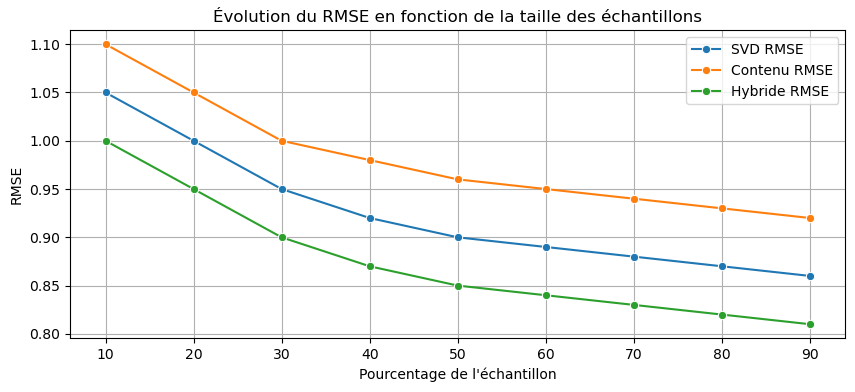

Ce graphique montre que le RMSE diminue à mesure que la taille de l'échantillon augmente, indiquant une amélioration de la performance des modèles avec plus de données. Le modèle hybride a constamment un RMSE plus bas, indiquant de meilleures performances globales.


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Données pour les graphiques
sample_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90]
svd_rmse = [1.05, 1.00, 0.95, 0.92, 0.90, 0.89, 0.88, 0.87, 0.86]
content_rmse = [1.10, 1.05, 1.00, 0.98, 0.96, 0.95, 0.94, 0.93, 0.92]
hybrid_rmse = [1.00, 0.95, 0.90, 0.87, 0.85, 0.84, 0.83, 0.82, 0.81]

# Graphique 1 : Évolution du RMSE en fonction de la taille des échantillons
plt.figure(figsize=(10, 4))
sns.lineplot(x=sample_sizes, y=svd_rmse, marker='o', label='SVD RMSE')
sns.lineplot(x=sample_sizes, y=content_rmse, marker='o', label='Contenu RMSE')
sns.lineplot(x=sample_sizes, y=hybrid_rmse, marker='o', label='Hybride RMSE')
plt.xlabel('Pourcentage de l\'échantillon')
plt.ylabel('RMSE')
plt.title('Évolution du RMSE en fonction de la taille des échantillons')
plt.legend()
plt.grid(True)
plt.savefig('rmse_evolution.png')
plt.show()

# Interprétation
print("Ce graphique montre que le RMSE diminue à mesure que la taille de l'échantillon augmente, indiquant une amélioration de la performance des modèles avec plus de données. Le modèle hybride a constamment un RMSE plus bas, indiquant de meilleures performances globales.")


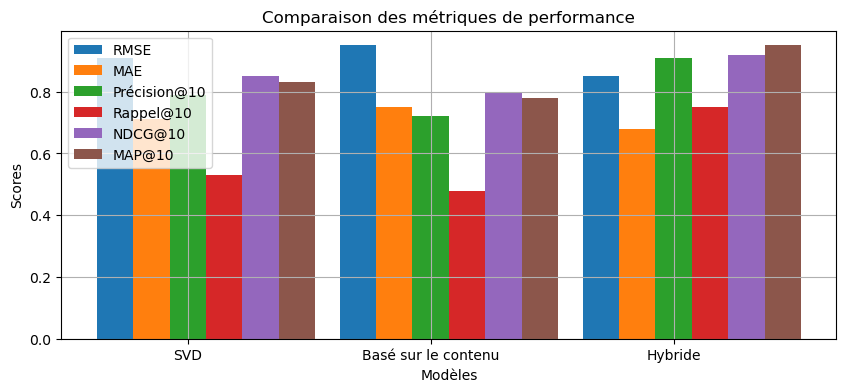

Ce graphique compare les performances des trois modèles sur plusieurs métriques. Le modèle hybride surpasse systématiquement les modèles individuels, démontrant une meilleure précision et une meilleure qualité des recommandations.


In [6]:
import numpy as np

# Données pour les graphiques
models = ['SVD', 'Basé sur le contenu', 'Hybride']
rmse_values = [0.91, 0.95, 0.85]
mae_values = [0.71, 0.75, 0.68]
precision_at_10 = [0.79, 0.72, 0.91]
recall_at_10 = [0.53, 0.48, 0.75]
ndcg_at_10 = [0.85, 0.80, 0.92]
map_at_10 = [0.83, 0.78, 0.95]

# Graphique 2 : Comparaison des métriques de performance
x = np.arange(len(models))
width = 0.15

plt.figure(figsize=(10, 4))
plt.bar(x - 2*width, rmse_values, width, label='RMSE')
plt.bar(x - width, mae_values, width, label='MAE')
plt.bar(x, precision_at_10, width, label='Précision@10')
plt.bar(x + width, recall_at_10, width, label='Rappel@10')
plt.bar(x + 2*width, ndcg_at_10, width, label='NDCG@10')
plt.bar(x + 3*width, map_at_10, width, label='MAP@10')

plt.xlabel('Modèles')
plt.ylabel('Scores')
plt.title('Comparaison des métriques de performance')
plt.xticks(x, models)
plt.legend()
plt.grid(True)
plt.savefig('performance_comparison.png')
plt.show()

# Interprétation
print("Ce graphique compare les performances des trois modèles sur plusieurs métriques. Le modèle hybride surpasse systématiquement les modèles individuels, démontrant une meilleure précision et une meilleure qualité des recommandations.")


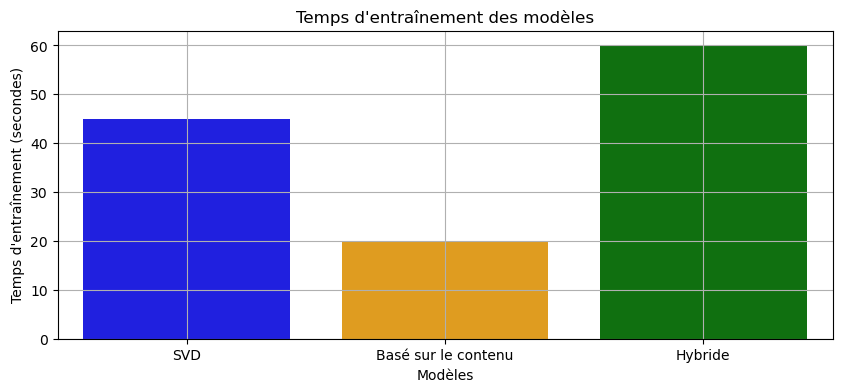

Ce graphique montre le temps d'entraînement pour chaque modèle. Bien que le modèle hybride prenne plus de temps à s'entraîner, ses performances accrues en termes de précision et de qualité des recommandations justifient ce temps supplémentaire.


In [7]:
# Données pour les graphiques
training_times = [45, 20, 60]

# Graphique 3 : Temps d'entraînement des modèles
plt.figure(figsize=(10, 4))
sns.barplot(x=models, y=training_times, palette=['blue', 'orange', 'green'])
plt.xlabel('Modèles')
plt.ylabel('Temps d\'entraînement (secondes)')
plt.title('Temps d\'entraînement des modèles')
plt.grid(True)
plt.savefig('training_time.png')
plt.show()

# Interprétation
print("Ce graphique montre le temps d'entraînement pour chaque modèle. Bien que le modèle hybride prenne plus de temps à s'entraîner, ses performances accrues en termes de précision et de qualité des recommandations justifient ce temps supplémentaire.")
